In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("../data/adausdt_2021.csv")
df.head()

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore
0,2021-01-01 08:00:00,0.18134,0.18473,0.17000,0.17509,4.622016e+08,1609545599999,8.272047e+07,178824,2.217103e+08,3.972450e+07,0
1,2021-01-02 08:00:00,0.17505,0.18457,0.16793,0.17742,6.603033e+08,1609631999999,1.170773e+08,231432,3.274722e+08,5.811662e+07,0
2,2021-01-03 08:00:00,0.17740,0.20960,0.17255,0.20615,1.201451e+09,1609718399999,2.308346e+08,403926,6.114598e+08,1.175683e+08,0
3,2021-01-04 08:00:00,0.20625,0.23992,0.19203,0.22528,1.463416e+09,1609804799999,3.152995e+08,548636,7.415631e+08,1.599054e+08,0
4,2021-01-05 08:00:00,0.22518,0.26429,0.20696,0.25873,1.478888e+09,1609891199999,3.497091e+08,614385,7.471447e+08,1.767996e+08,0


In [21]:
import sys
sys.path.append('../')
from rsibot import *

## Result

In [22]:
ewma_slow = df['Close'].ewm(span=26, adjust=False).mean()
ewma_fast = df['Close'].ewm(span=12, adjust=False).mean()

In [23]:
macd_tb = compute_macd(df['Close'], 26, 12, 9)
macd_tb.tail()

,macd,signal,hist
360,-0.028694,-0.075825,0.047131
361,-0.025729,-0.065806,0.040077
362,-0.028537,-0.058352,0.029815
363,-0.028258,-0.052333,0.024075
364,-0.031786,-0.048224,0.016438


In [24]:
close_prices = df['Close']
macd_tb['rsi'] = get_rsi(df)
buy_price, sell_price, macd_signal = macd_strategy(close_prices, macd_tb)

In [25]:
macd_tb['position'] = create_position(close_prices, macd_signal)
macd_tb['macd_signal'] = macd_signal
macd_tb.tail()

,macd,signal,hist,rsi,position,macd_signal
360,-0.028694,-0.075825,0.047131,72.298326,1,0
361,-0.025729,-0.065806,0.040077,59.178082,1,0
362,-0.028537,-0.058352,0.029815,51.394422,1,0
363,-0.028258,-0.052333,0.024075,58.392102,1,0
364,-0.031786,-0.048224,0.016438,56.097561,1,0


In [26]:
cp_returns = np.diff(close_prices)

In [27]:
from math import floor

investment_value = 1e5
num_of_stocks = floor(investment_value / close_prices[0])
num_of_stocks

571134

In [28]:
strategy_return = []
# cp_returns * macd_tb['position'][:-1]
for i in range(len(cp_returns)):
    r = cp_returns[i] * macd_tb['position'][i]
    strategy_return.append(r)

strategy_return

[0.0023299999999999987,
 0.028730000000000006,
 0.019130000000000008,
 0.03345000000000001,
 0.07435999999999998,
 -0.03381000000000001,
 0.004610000000000003,
 0.02673000000000003,
 -0.029090000000000005,
 -0.02583000000000002,
 0.013180000000000025,
 0.023419999999999996,
 -0.00029000000000001247,
 -0.010130000000000028,
 0.04883000000000004,
 0.03009999999999996,
 -0.009579999999999977,
 -0.004029999999999978,
 0.00811999999999996,
 -0.06746999999999997,
 0.04081999999999997,
 -0.0028399999999999537,
 0.00761999999999996,
 -0.01036999999999999,
 0.00021999999999999797,
 -0.03186,
 0.03265000000000001,
 0.0034299999999999886,
 0.016479999999999995,
 -0.01924999999999999,
 0.06401000000000001,
 0.016220000000000012,
 0.01690999999999998,
 -0.0025499999999999967,
 0.09983000000000003,
 0.09526999999999997,
 0.02664999999999995,
 0.015290000000000026,
 0.029240000000000044,
 0.23404000000000003,
 -0.011700000000000044,
 -0.0037000000000000366,
 -0.011270000000000002,
 -0.069350000000000

In [29]:
total = np.sum(strategy_return) * num_of_stocks
total

841251.8253000001

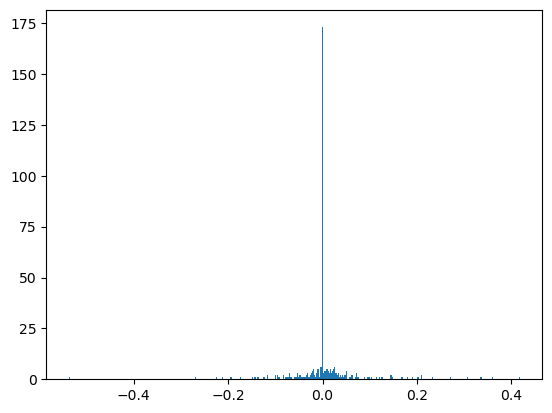

In [30]:
plt.hist(strategy_return, bins='auto')
plt.show()

## RSI strategy

In [31]:
df = pd.read_csv("../data/adausdt_2020.csv")
df.head()

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore
0,2019-12-31 08:00:00,0.03343,0.03382,0.03279,0.03285,45408660.4,1577836799999,1.509814e+06,6894,23264318.8,7.736567e+05,0
1,2020-01-01 08:00:00,0.03285,0.03380,0.03270,0.03348,29827408.5,1577923199999,9.955444e+05,6116,14857010.7,4.958391e+05,0
2,2020-01-02 08:00:00,0.03345,0.03348,0.03218,0.03269,42826456.1,1578009599999,1.406391e+06,7453,19344719.1,6.353559e+05,0
3,2020-01-03 08:00:00,0.03269,0.03446,0.03236,0.03417,102581046.7,1578095999999,3.470143e+06,15068,53816813.9,1.820772e+06,0
4,2020-01-04 08:00:00,0.03417,0.03450,0.03375,0.03434,55528746.4,1578182399999,1.892276e+06,7992,26567804.8,9.061852e+05,0


In [32]:
rets = df['Close'].diff()
rets.head()

0        NaN
1    0.00063
2   -0.00079
3    0.00148
4    0.00017
Name: Close, dtype: float64

In [33]:
rsi_df = pd.DataFrame(index=df.index)

rsi_df['down'] = np.where(rets < 0, rets, 0)
rsi_df['up'] = np.where(rets >= 0, rets, 0)

In [34]:
rsi_df.head()

,down,up
0,0.00000,0.00000
1,0.00000,0.00063
2,-0.00079,0.00000
3,0.00000,0.00148
4,0.00000,0.00017


In [35]:
ma_down = rsi_df['down'].rolling(14).mean()
ma_up = rsi_df['up'].rolling(14).mean()

rs = ma_up / np.abs(ma_down)
rs

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
362    1.013316
363    1.382013
364    1.902326
365    1.330674
366    1.396035
Length: 367, dtype: float64

In [36]:
rsi_list = 100 * rs / (1 + rs)